In [171]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")
print("📊 StandardScaler listo para estandarización")

✅ Librerías importadas correctamente
📊 StandardScaler listo para estandarización


In [172]:
# Cargar dataset unificado nocturno
print("📂 CARGANDO DATASET UNIFICADO NOCTURNO")
print("="*50)

try:
    # Cargar el dataset
    df_original = pd.read_csv('dataset_unificado_nocturno_2021_2025.csv')
    
    print(f"✅ Dataset cargado exitosamente:")
    print(f"   📊 Forma original: {df_original.shape}")
    print(f"   📅 Período: {df_original['Ano'].min()}-{df_original['mes'].min():02d} a {df_original['Ano'].max()}-{df_original['mes'].max():02d}")
    print(f"   📍 Estaciones: {df_original['station'].nunique()}")
    
    # Verificar que las variables a estandarizar existen
    variables_estandarizar = ['dist_km', 'viento_util_kmh', 'tiempo_horas']
    variables_encontradas = [var for var in variables_estandarizar if var in df_original.columns]
    variables_faltantes = [var for var in variables_estandarizar if var not in df_original.columns]
    
    print(f"\n🎯 VARIABLES PARA ESTANDARIZAR:")
    print(f"   ✅ Encontradas ({len(variables_encontradas)}): {variables_encontradas}")
    if variables_faltantes:
        print(f"   ❌ Faltantes ({len(variables_faltantes)}): {variables_faltantes}")
    
    # Mostrar estadísticas descriptivas de las variables a estandarizar
    if variables_encontradas:
        print(f"\n📊 ESTADÍSTICAS ANTES DE ESTANDARIZAR:")
        print(df_original[variables_encontradas].describe().round(3))
    
    # Mostrar muestra del dataset
    print(f"\n📋 MUESTRA DEL DATASET ORIGINAL:")
    print(df_original.head())
    
except Exception as e:
    print(f"❌ Error cargando dataset: {e}")
    df_original = pd.DataFrame()

📂 CARGANDO DATASET UNIFICADO NOCTURNO
✅ Dataset cargado exitosamente:
   📊 Forma original: (787, 13)
   📅 Período: 2021-01 a 2025-12
   📍 Estaciones: 15

🎯 VARIABLES PARA ESTANDARIZAR:
   ✅ Encontradas (3): ['dist_km', 'viento_util_kmh', 'tiempo_horas']

📊 ESTADÍSTICAS ANTES DE ESTANDARIZAR:
       dist_km  viento_util_kmh  tiempo_horas
count  787.000          787.000       787.000
mean    30.158            2.830        95.903
std     13.960            4.003       336.390
min      6.591           -7.463         0.432
25%     22.089           -0.187         5.107
50%     30.673            1.986        12.251
75%     38.180            5.487        44.482
max     61.511           15.517      3290.631

📋 MUESTRA DEL DATASET ORIGINAL:
    Ano  mes station   dist_km  viento_util_kmh  tiempo_horas  SO2_mean  \
0  2021    8     SE3  7.993933        -5.746788      2.782053    0.0374   
1  2021    5     SE3  7.993933        -3.398607      4.704241    0.0637   
2  2021    6     SE3  7.993933     

In [173]:
# Estandarizar las variables especificadas
if not df_original.empty and variables_encontradas:
    print("⚙️ ESTANDARIZANDO VARIABLES")
    print("="*40)
    
    # Crear una copia del dataframe para no modificar el original
    df_estandarizado = df_original.copy()
    
    # Inicializar el StandardScaler
    scaler = StandardScaler()
    
    # Estandarizar cada variable individualmente para manejar valores faltantes
    for variable in variables_encontradas:
        print(f"\n🔄 Procesando: {variable}")
        
        # Verificar valores faltantes
        valores_faltantes = df_estandarizado[variable].isna().sum()
        if valores_faltantes > 0:
            print(f"   ⚠️ Valores faltantes: {valores_faltantes} ({valores_faltantes/len(df_estandarizado)*100:.1f}%)")
        
        # Estandarizar solo valores no faltantes
        valores_validos = df_estandarizado[variable].notna()
        
        if valores_validos.sum() > 0:  # Si hay al menos un valor válido
            # Extraer valores válidos para estandarizar
            valores_originales = df_estandarizado.loc[valores_validos, variable].values.reshape(-1, 1)
            
            # Aplicar estandarización
            valores_estandarizados = scaler.fit_transform(valores_originales)
            
            # Asignar valores estandarizados de vuelta al dataframe
            df_estandarizado.loc[valores_validos, variable] = valores_estandarizados.flatten()
            
            # Estadísticas antes y después
            original_stats = df_original[variable].describe()
            estandarizado_stats = df_estandarizado[variable].describe()
            
            print(f"   📊 Antes  - Media: {original_stats['mean']:.3f}, Std: {original_stats['std']:.3f}")
            print(f"   ✅ Después - Media: {estandarizado_stats['mean']:.3f}, Std: {estandarizado_stats['std']:.3f}")
        else:
            print(f"   ❌ No hay valores válidos para estandarizar")
    
    print(f"\n✅ Estandarización completada")
    print(f"📊 Variables estandarizadas: {len(variables_encontradas)}")
    
    # Verificar que la estandarización fue exitosa
    print(f"\n🔍 VERIFICACIÓN DE ESTANDARIZACIÓN:")
    for variable in variables_encontradas:
        media = df_estandarizado[variable].mean()
        std = df_estandarizado[variable].std()
        print(f"   {variable}: Media ≈ {media:.6f}, Std ≈ {std:.6f}")
    
else:
    print("❌ No se puede estandarizar - dataset vacío o variables no encontradas")
    df_estandarizado = pd.DataFrame()

⚙️ ESTANDARIZANDO VARIABLES

🔄 Procesando: dist_km
   📊 Antes  - Media: 30.158, Std: 13.960
   ✅ Después - Media: 0.000, Std: 1.001

🔄 Procesando: viento_util_kmh
   📊 Antes  - Media: 2.830, Std: 4.003
   ✅ Después - Media: 0.000, Std: 1.001

🔄 Procesando: tiempo_horas
   📊 Antes  - Media: 95.903, Std: 336.390
   ✅ Después - Media: 0.000, Std: 1.001

✅ Estandarización completada
📊 Variables estandarizadas: 3

🔍 VERIFICACIÓN DE ESTANDARIZACIÓN:
   dist_km: Media ≈ 0.000000, Std ≈ 1.000636
   viento_util_kmh: Media ≈ 0.000000, Std ≈ 1.000636
   tiempo_horas: Media ≈ 0.000000, Std ≈ 1.000636


In [174]:
# Comparar datasets antes y después de estandarización
if not df_estandarizado.empty:
    print("📊 COMPARACIÓN ANTES VS DESPUÉS")
    print("="*45)
    
    # Crear tabla comparativa
    comparacion = pd.DataFrame({
        'Variable': variables_encontradas
    })
    
    for variable in variables_encontradas:
        # Estadísticas originales
        orig_mean = df_original[variable].mean()
        orig_std = df_original[variable].std()
        orig_min = df_original[variable].min()
        orig_max = df_original[variable].max()
        
        # Estadísticas estandarizadas
        std_mean = df_estandarizado[variable].mean()
        std_std = df_estandarizado[variable].std()
        std_min = df_estandarizado[variable].min()
        std_max = df_estandarizado[variable].max()
        
        print(f"\n📈 {variable.upper()}:")
        print(f"   Original    - Media: {orig_mean:8.3f} | Std: {orig_std:8.3f} | Rango: [{orig_min:8.3f}, {orig_max:8.3f}]")
        print(f"   Estandarizado - Media: {std_mean:8.3f} | Std: {std_std:8.3f} | Rango: [{std_min:8.3f}, {std_max:8.3f}]")
    
    # Mostrar muestra del dataset estandarizado
    print(f"\n📋 MUESTRA DEL DATASET ESTANDARIZADO:")
    columnas_mostrar = ['Ano', 'mes', 'station'] + variables_encontradas + ['SO2_mean']
    columnas_disponibles = [col for col in columnas_mostrar if col in df_estandarizado.columns]
    print(df_estandarizado[columnas_disponibles].head().round(4))
    
    print(f"\n✅ Comparación completada")
    print(f"🎯 Las variables están ahora estandarizadas (media≈0, std≈1)")

else:
    print("❌ No se puede realizar comparación - dataset estandarizado no disponible")

📊 COMPARACIÓN ANTES VS DESPUÉS

📈 DIST_KM:
   Original    - Media:   30.158 | Std:   13.960 | Rango: [   6.591,   61.511]
   Estandarizado - Media:    0.000 | Std:    1.001 | Rango: [  -1.689,    2.247]

📈 VIENTO_UTIL_KMH:
   Original    - Media:    2.830 | Std:    4.003 | Rango: [  -7.463,   15.517]
   Estandarizado - Media:    0.000 | Std:    1.001 | Rango: [  -2.573,    3.171]

📈 TIEMPO_HORAS:
   Original    - Media:   95.903 | Std:  336.390 | Rango: [   0.432, 3290.631]
   Estandarizado - Media:    0.000 | Std:    1.001 | Rango: [  -0.284,    9.503]

📋 MUESTRA DEL DATASET ESTANDARIZADO:
    Ano  mes station  dist_km  viento_util_kmh  tiempo_horas  SO2_mean
0  2021    8     SE3  -1.5887          -2.1439       -0.2770    0.0374
1  2021    5     SE3  -1.5887          -1.5570       -0.2713    0.0637
2  2021    6     SE3  -1.5887          -1.5468       -0.2711   -0.1623
3  2021    7     SE3  -1.5887          -1.5364       -0.2709   -0.1820
4  2021    9     SE3  -1.5887          -1.5271 

In [175]:
# Información del dataset final estandarizado
if not df_estandarizado.empty:
    print("ℹ️ INFORMACIÓN FINAL DEL DATASET ESTANDARIZADO")
    print("="*55)
    
    # Información general
    print(f"📊 INFORMACIÓN GENERAL:")
    print(f"   📁 Archivo: dataset_unificado_nocturno_2021_2025_estandarizado.csv")
    print(f"   📏 Dimensiones: {df_estandarizado.shape[0]:,} filas × {df_estandarizado.shape[1]} columnas")
    print(f"   🕐 Período temporal: {df_estandarizado['Ano'].min()}-{df_estandarizado['Ano'].max()}")
    print(f"   📍 Número de estaciones: {df_estandarizado['station'].nunique()}")
    
    # Lista de todas las columnas
    print(f"\n📋 TODAS LAS COLUMNAS ({len(df_estandarizado.columns)}):")
    for i, col in enumerate(df_estandarizado.columns, 1):
        if col in variables_encontradas:
            print(f"   {i:2d}. {col} ⚙️ [ESTANDARIZADA]")
        else:
            print(f"   {i:2d}. {col}")
    
    # Estadísticas de las variables estandarizadas
    print(f"\n📊 ESTADÍSTICAS VARIABLES ESTANDARIZADAS:")
    stats_estandarizadas = df_estandarizado[variables_encontradas].describe().round(4)
    print(stats_estandarizadas)
    
    # Verificación de estandarización exitosa
    print(f"\n✅ VERIFICACIÓN DE ESTANDARIZACIÓN:")
    todas_correctas = True
    for variable in variables_encontradas:
        media = df_estandarizado[variable].mean()
        std = df_estandarizado[variable].std()
        
        # Verificar que media ≈ 0 y std ≈ 1 (con tolerancia)
        media_ok = abs(media) < 1e-10
        std_ok = abs(std - 1.0) < 1e-10
        
        status = "✅" if (media_ok and std_ok) else "⚠️"
        print(f"   {status} {variable}: Media = {media:.2e}, Std = {std:.6f}")
        
        if not (media_ok and std_ok):
            todas_correctas = False
    
    if todas_correctas:
        print(f"\n🎉 ¡ESTANDARIZACIÓN EXITOSA!")
        print(f"   Todas las variables tienen media ≈ 0 y desviación estándar ≈ 1")
    else:
        print(f"\n⚠️ Revisar estandarización - algunos valores no están en el rango esperado")
    
    print(f"\n📝 Dataset listo para análisis factorial o machine learning")
    
else:
    print("❌ Dataset estandarizado no disponible")

ℹ️ INFORMACIÓN FINAL DEL DATASET ESTANDARIZADO
📊 INFORMACIÓN GENERAL:
   📁 Archivo: dataset_unificado_nocturno_2021_2025_estandarizado.csv
   📏 Dimensiones: 787 filas × 13 columnas
   🕐 Período temporal: 2021-2025
   📍 Número de estaciones: 15

📋 TODAS LAS COLUMNAS (13):
    1. Ano
    2. mes
    3. station
    4. dist_km ⚙️ [ESTANDARIZADA]
    5. viento_util_kmh ⚙️ [ESTANDARIZADA]
    6. tiempo_horas ⚙️ [ESTANDARIZADA]
    7. SO2_mean
    8. RAINF_mean
    9. RAINF_std
   10. WSR_mean
   11. WSR_std
   12. WDR_mean
   13. WDR_std

📊 ESTADÍSTICAS VARIABLES ESTANDARIZADAS:
        dist_km  viento_util_kmh  tiempo_horas
count  787.0000         787.0000      787.0000
mean     0.0000           0.0000        0.0000
std      1.0006           1.0006        1.0006
min     -1.6892          -2.5729       -0.2840
25%     -0.5784          -0.7541       -0.2701
50%      0.0369          -0.2110       -0.2488
75%      0.5750           0.6642       -0.1530
max      2.2473           3.1713        9.503

In [176]:
# Análisis Factorial PAF (Principal Axis Factoring)
print("🔬 ANÁLISIS FACTORIAL PAF - PRINCIPAL AXIS FACTORING")
print("="*60)

# Importar librerías adicionales para análisis factorial
try:
    from factor_analyzer import FactorAnalyzer
    from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
    from factor_analyzer.factor_analyzer import calculate_kmo
    print("✅ Librerías de análisis factorial importadas correctamente")
except ImportError:
    print("❌ Instalando factor_analyzer...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'factor_analyzer'])
    from factor_analyzer import FactorAnalyzer
    from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
    from factor_analyzer.factor_analyzer import calculate_kmo
    print("✅ factor_analyzer instalado e importado")

import scipy.stats as stats

print("📊 Librerías listas para PAF")

🔬 ANÁLISIS FACTORIAL PAF - PRINCIPAL AXIS FACTORING
✅ Librerías de análisis factorial importadas correctamente
📊 Librerías listas para PAF


In [177]:
# Preparar datos para análisis factorial
if not df_estandarizado.empty:
    print("🔧 PREPARANDO DATOS PARA ANÁLISIS FACTORIAL PAF")
    print("="*50)
    
    # Seleccionar variables numéricas excluyendo IDs y variables categóricas
    exclude_cols = ['Ano', 'mes', 'station', 'dist_km']  # Agregamos dist_km a exclusiones
    numeric_cols = df_estandarizado.select_dtypes(include=[np.number]).columns.tolist()
    
    # Variables para análisis factorial (excluyendo count, IDs, dist_km y variables std)
    factor_vars = [col for col in numeric_cols 
                   if col not in exclude_cols 
                   and 'count' not in col.lower()
                   and 'std' not in col.lower()]
    
    print(f"📊 Variables para análisis factorial:")
    print(f"   Total: {len(factor_vars)} variables")
    print(f"   Variables: {factor_vars}")
    print(f"   ❌ Excluidas: ['Ano', 'mes', 'station', 'dist_km'] + variables 'count' + variables 'std'")
    
    # Verificar que SO2_mean está incluida
    if 'SO2_mean' in factor_vars:
        print(f"✅ SO2_mean incluida en el análisis")
    else:
        print(f"❌ SO2_mean no encontrada")
    
    # Dataset limpio para análisis factorial
    df_factor = df_estandarizado[factor_vars + ['station']].dropna()
    
    print(f"\n📊 Dataset para análisis factorial:")
    print(f"   📏 Registros: {len(df_factor):,}")
    print(f"   📈 Variables: {len(factor_vars)}")
    print(f"   📍 Estaciones: {df_factor['station'].nunique()}")
    
    print(f"\n💡 NOTA: Excluidas variables con 'std' para reducir multicolinealidad")
    print(f"   También excluida dist_km (varianza cero por estación)")
    
else:
    print("❌ Dataset estandarizado no disponible")
    df_factor = pd.DataFrame()

🔧 PREPARANDO DATOS PARA ANÁLISIS FACTORIAL PAF
📊 Variables para análisis factorial:
   Total: 6 variables
   Variables: ['viento_util_kmh', 'tiempo_horas', 'SO2_mean', 'RAINF_mean', 'WSR_mean', 'WDR_mean']
   ❌ Excluidas: ['Ano', 'mes', 'station', 'dist_km'] + variables 'count' + variables 'std'
✅ SO2_mean incluida en el análisis

📊 Dataset para análisis factorial:
   📏 Registros: 787
   📈 Variables: 6
   📍 Estaciones: 15

💡 NOTA: Excluidas variables con 'std' para reducir multicolinealidad
   También excluida dist_km (varianza cero por estación)


In [178]:
# Celda para corregir el análisis PAF - EXCLUIR SO2_mean de variables predictoras
if not df_estandarizado.empty:
    print("🔧 CORRIGIENDO ANÁLISIS PAF - SIN LÓGICA CIRCULAR")
    print("="*60)
    print("❌ PROBLEMA IDENTIFICADO: SO2_mean no debe estar en variables predictoras")
    print("✅ SOLUCIÓN: Crear factores SIN SO2_mean, luego ver cuánto explican SO2")
    print("="*60)
    
    # Variables INDEPENDIENTES (sin SO2_mean)
    exclude_cols = ['Ano', 'mes', 'station', 'dist_km', 'SO2_mean']  # ¡AGREGAR SO2_mean!
    numeric_cols = df_estandarizado.select_dtypes(include=[np.number]).columns.tolist()
    
    # Variables PREDICTORAS (sin SO2_mean)
    factor_vars_correcto = [col for col in numeric_cols 
                           if col not in exclude_cols 
                           and 'count' not in col.lower()
                           and 'std' not in col.lower()]
    
    print(f"🎯 VARIABLES PREDICTORAS CORREGIDAS (SIN SO2_mean):")
    print(f"   Total: {len(factor_vars_correcto)} variables")
    print(f"   Variables: {factor_vars_correcto}")
    print(f"   ❌ Excluidas: {exclude_cols}")
    
    # Verificar que SO2_mean NO esté incluida
    if 'SO2_mean' not in factor_vars_correcto:
        print(f"✅ SO2_mean correctamente EXCLUIDA de variables predictoras")
    else:
        print(f"❌ ERROR: SO2_mean aún está en variables predictoras")
    
    # Dataset para factores (sin SO2_mean) + SO2_mean como variable dependiente
    df_factor_correcto = df_estandarizado[factor_vars_correcto + ['SO2_mean', 'station']].dropna()
    
    print(f"\n📊 Dataset corregido:")
    print(f"   📏 Registros: {len(df_factor_correcto):,}")
    print(f"   📈 Variables predictoras: {len(factor_vars_correcto)}")
    print(f"   🎯 Variable dependiente: SO2_mean")
    print(f"   📍 Estaciones: {df_factor_correcto['station'].nunique()}")
    
    print(f"\n💡 AHORA SÍ: Los factores se crean SOLO con variables meteorológicas/transporte")
    print(f"    y luego vemos cuánto explican el comportamiento de SO2")

else:
    print("❌ Dataset estandarizado no disponible")
    df_factor_correcto = pd.DataFrame()

🔧 CORRIGIENDO ANÁLISIS PAF - SIN LÓGICA CIRCULAR
❌ PROBLEMA IDENTIFICADO: SO2_mean no debe estar en variables predictoras
✅ SOLUCIÓN: Crear factores SIN SO2_mean, luego ver cuánto explican SO2
🎯 VARIABLES PREDICTORAS CORREGIDAS (SIN SO2_mean):
   Total: 5 variables
   Variables: ['viento_util_kmh', 'tiempo_horas', 'RAINF_mean', 'WSR_mean', 'WDR_mean']
   ❌ Excluidas: ['Ano', 'mes', 'station', 'dist_km', 'SO2_mean']
✅ SO2_mean correctamente EXCLUIDA de variables predictoras

📊 Dataset corregido:
   📏 Registros: 787
   📈 Variables predictoras: 5
   🎯 Variable dependiente: SO2_mean
   📍 Estaciones: 15

💡 AHORA SÍ: Los factores se crean SOLO con variables meteorológicas/transporte
    y luego vemos cuánto explican el comportamiento de SO2


In [179]:
# Función PAF corregida - Sin lógica circular
def realizar_paf_correcto(data, factor_variables, so2_variable='SO2_mean', nombre_analisis="General", n_factors=3):
    """
    Realiza análisis PAF CORRECTO: factores creados sin SO2, luego correlaciona con SO2
    """
    print(f"\n🔍 ANÁLISIS PAF CORREGIDO - {nombre_analisis.upper()}")
    print("-" * 50)
    
    # Preparar datos SOLO para factores (sin SO2)
    X = data[factor_variables].copy()
    
    if len(X) < 10:  # Mínimo de casos para PAF
        print(f"❌ Insuficientes datos ({len(X)} casos) para análisis confiable")
        return None
    
    print(f"📊 Variables para factores: {len(factor_variables)} variables")
    print(f"🎯 Variable objetivo: {so2_variable}")
    print(f"📏 Registros: {len(X)}")
    
    # Tests de adecuación para variables predictoras
    try:
        chi_square_value, p_value = calculate_bartlett_sphericity(X)
        bartlett_ok = p_value < 0.05
        
        kmo_all, kmo_model = calculate_kmo(X)
        kmo_ok = kmo_model > 0.5
        
        print(f"\n🧪 Tests de adecuación (variables predictoras):")
        print(f"   Bartlett: χ² = {chi_square_value:.2f}, p = {p_value:.4f} {'✅' if bartlett_ok else '❌'}")
        print(f"   KMO: {kmo_model:.3f} {'✅' if kmo_ok else '❌'}")
        
    except Exception as e:
        print(f"⚠️ Error en tests de adecuación: {e}")
    
    # Realizar PAF solo con variables predictoras
    try:
        fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation='varimax')
        fa.fit(X)
        
        # Obtener factores extraídos
        factor_scores = fa.transform(X)  # Scores de los factores
        loadings = fa.loadings_
        eigenvalues, _ = fa.get_eigenvalues()
        
        # Varianza explicada por los factores (de las variables predictoras)
        total_variance_explained = np.sum(eigenvalues[:n_factors])
        percent_variance = (total_variance_explained / len(factor_variables)) * 100
        
        print(f"\n📈 FACTORES EXTRAÍDOS (solo variables predictoras):")
        print(f"   🎯 Factores extraídos: {n_factors}")
        print(f"   📊 Varianza de predictoras explicada: {percent_variance:.1f}%")
        
        # Ahora correlacionar los factores CON SO2
        print(f"\n🔗 CORRELACIONES FACTORES ↔ SO2:")
        
        so2_data = data[so2_variable]
        correlaciones_so2 = []
        
        for i in range(n_factors):
            factor_scores_i = factor_scores[:, i]
            correlacion = np.corrcoef(factor_scores_i, so2_data)[0, 1]
            correlaciones_so2.append(correlacion)
            
            print(f"   Factor {i+1} ↔ SO2: r = {correlacion:6.3f} (r² = {correlacion**2:.3f})")
        
        # Calcular R² múltiple: cuánto explican TODOS los factores juntos a SO2
        from sklearn.linear_model import LinearRegression
        from sklearn.metrics import r2_score
        
        lr = LinearRegression()
        lr.fit(factor_scores, so2_data)
        so2_predicted = lr.predict(factor_scores)
        r2_total = r2_score(so2_data, so2_predicted)
        
        print(f"\n🎯 EXPLICACIÓN DE SO2 POR LOS FACTORES:")
        print(f"   📊 R² total (todos los factores → SO2): {r2_total:.3f} ({r2_total*100:.1f}%)")
        print(f"   💡 Los factores explican {r2_total*100:.1f}% de la varianza de SO2")
        print(f"   ❓ Varianza NO explicada: {(1-r2_total)*100:.1f}%")
        
        # Factor más importante para SO2
        factor_mas_importante = np.argmax(np.abs(correlaciones_so2)) + 1
        corr_mas_alta = correlaciones_so2[np.argmax(np.abs(correlaciones_so2))]
        
        print(f"\n🏆 FACTOR MÁS IMPORTANTE PARA SO2:")
        print(f"   Factor {factor_mas_importante} (r = {corr_mas_alta:.3f})")
        
        # Mostrar composición de factores
        print(f"\n📋 COMPOSICIÓN DE FACTORES:")
        for i in range(n_factors):
            print(f"\n   🔧 Factor {i+1} (r con SO2 = {correlaciones_so2[i]:.3f}):")
            
            # Variables con mayor loading en este factor
            factor_loadings = np.abs(loadings[:, i])
            sorted_idx = np.argsort(factor_loadings)[::-1]
            
            for j in range(min(3, len(factor_variables))):  # Top 3
                var_idx = sorted_idx[j]
                var_name = factor_variables[var_idx]
                loading_val = loadings[var_idx, i]
                print(f"     {j+1}. {var_name}: {loading_val:6.3f}")
        
        return {
            'fa_model': fa,
            'factor_scores': factor_scores,
            'loadings': loadings,
            'eigenvalues': eigenvalues,
            'correlaciones_so2': correlaciones_so2,
            'r2_total_so2': r2_total,
            'variance_explained_predictoras': percent_variance,
            'n_samples': len(X),
            'lr_model': lr
        }
        
    except Exception as e:
        print(f"❌ Error en análisis PAF: {e}")
        return None

print("✅ Función PAF corregida definida (sin lógica circular)")

✅ Función PAF corregida definida (sin lógica circular)


In [180]:
# Análisis PAF CORREGIDO - General y por estaciones
if not df_factor_correcto.empty:
    print("🌐 ANÁLISIS PAF CORREGIDO - GENERAL")
    print("="*50)
    
    # Análisis general corregido
    resultado_general_correcto = realizar_paf_correcto(
        data=df_factor_correcto,
        factor_variables=factor_vars_correcto,
        so2_variable='SO2_mean',
        nombre_analisis="GENERAL CORREGIDO",
        n_factors=3
    )
    
    if resultado_general_correcto:
        print(f"\n📋 RESUMEN GENERAL CORREGIDO:")
        print(f"   📊 Muestra: {resultado_general_correcto['n_samples']:,} registros")
        print(f"   🎯 R² SO2 explicado por factores: {resultado_general_correcto['r2_total_so2']*100:.1f}%")
        print(f"   💡 Varianza SO2 NO explicada: {(1-resultado_general_correcto['r2_total_so2'])*100:.1f}%")
        
        # Guardar para comparación posterior
        r2_general_correcto = resultado_general_correcto['r2_total_so2']
    
    print(f"\n📍 ANÁLISIS PAF CORREGIDO - POR ESTACIONES")
    print("="*55)
    
    resultados_estaciones_correctos = {}
    resumen_corregido = []
    
    estaciones = sorted(df_factor_correcto['station'].unique())
    
    for estacion in estaciones:
        datos_estacion = df_factor_correcto[df_factor_correcto['station'] == estacion]
        
        if len(datos_estacion) >= 10:  # Mínimo para análisis
            resultado = realizar_paf_correcto(
                data=datos_estacion,
                factor_variables=factor_vars_correcto,
                so2_variable='SO2_mean',
                nombre_analisis=f"ESTACIÓN {estacion}",
                n_factors=3
            )
            
            if resultado:
                resultados_estaciones_correctos[estacion] = resultado
                
                # Factor más importante para SO2
                factor_principal = np.argmax(np.abs(resultado['correlaciones_so2'])) + 1
                corr_principal = resultado['correlaciones_so2'][np.argmax(np.abs(resultado['correlaciones_so2']))]
                
                resumen_corregido.append({
                    'Estacion': estacion,
                    'N_registros': resultado['n_samples'],
                    'R2_SO2_%': resultado['r2_total_so2'] * 100,
                    'Factor_Principal': factor_principal,
                    'Correlacion_Principal': corr_principal
                })
        else:
            print(f"\n❌ {estacion}: Insuficientes datos ({len(datos_estacion)} registros)")
    
    # Crear tabla resumen corregida
    if resumen_corregido:
        df_resumen_correcto = pd.DataFrame(resumen_corregido)
        
        print(f"\n📊 TABLA RESUMEN PAF CORREGIDO:")
        print("="*55)
        print(f"{'Estación':<15} {'N':<6} {'R²_SO2%':<9} {'F_Prin':<7} {'r_max':<8}")
        print("-" * 55)
        
        for _, row in df_resumen_correcto.iterrows():
            print(f"{row['Estacion']:<15} {row['N_registros']:<6} "
                  f"{row['R2_SO2_%']:<8.1f}% {row['Factor_Principal']:<7} "
                  f"{row['Correlacion_Principal']:<8.3f}")
        
        # Estadísticas del resumen corregido
        print(f"\n📈 ESTADÍSTICAS RESUMEN CORREGIDO:")
        media_r2 = df_resumen_correcto['R2_SO2_%'].mean()
        std_r2 = df_resumen_correcto['R2_SO2_%'].std()
        min_r2 = df_resumen_correcto['R2_SO2_%'].min()
        max_r2 = df_resumen_correcto['R2_SO2_%'].max()
        
        print(f"   🎯 R² SO2 explicado por factores:")
        print(f"     Media: {media_r2:.1f}% ± {std_r2:.1f}%")
        print(f"     Rango: [{min_r2:.1f}%, {max_r2:.1f}%]")
        print(f"     General: {r2_general_correcto*100:.1f}%")
        
        # Comparar con análisis anterior (incorrecto)
        print(f"\n🔍 COMPARACIÓN: ANÁLISIS ANTERIOR vs CORREGIDO")
        print("="*50)
        print(f"❌ Análisis ANTERIOR (con lógica circular):")
        if 'resultado_general' in locals() and resultado_general:
            print(f"   Varianza SO2 'explicada': {resultado_general['so2_communality']*100:.1f}%")
        
        print(f"✅ Análisis CORREGIDO (sin lógica circular):")
        print(f"   R² SO2 explicado: {r2_general_correcto*100:.1f}%")
        print(f"   📊 Los factores meteorológicos/transporte explican")
        print(f"      {r2_general_correcto*100:.1f}% del comportamiento de SO2")
        
    else:
        print("❌ No se pudieron procesar estaciones con análisis corregido")
        
else:
    print("❌ Dataset corregido no disponible")

🌐 ANÁLISIS PAF CORREGIDO - GENERAL

🔍 ANÁLISIS PAF CORREGIDO - GENERAL CORREGIDO
--------------------------------------------------
📊 Variables para factores: 5 variables
🎯 Variable objetivo: SO2_mean
📏 Registros: 787

🧪 Tests de adecuación (variables predictoras):
   Bartlett: χ² = 425.52, p = 0.0000 ✅
   KMO: 0.589 ✅

📈 FACTORES EXTRAÍDOS (solo variables predictoras):
   🎯 Factores extraídos: 3
   📊 Varianza de predictoras explicada: 76.6%

🔗 CORRELACIONES FACTORES ↔ SO2:
   Factor 1 ↔ SO2: r =  0.042 (r² = 0.002)
   Factor 2 ↔ SO2: r =  0.789 (r² = 0.622)
   Factor 3 ↔ SO2: r =  0.061 (r² = 0.004)

🎯 EXPLICACIÓN DE SO2 POR LOS FACTORES:
   📊 R² total (todos los factores → SO2): 0.628 (62.8%)
   💡 Los factores explican 62.8% de la varianza de SO2
   ❓ Varianza NO explicada: 37.2%

🏆 FACTOR MÁS IMPORTANTE PARA SO2:
   Factor 2 (r = 0.789)

📋 COMPOSICIÓN DE FACTORES:

   🔧 Factor 1 (r con SO2 = 0.042):
     1. viento_util_kmh:  0.842
     2. WSR_mean:  0.735
     3. WDR_mean: -0.688

 

In [181]:
# TABLA CORREGIDA: % R² SO2 EXPLICADO POR FACTORES (SIN LÓGICA CIRCULAR)
if 'resultado_general_correcto' in locals() and resultado_general_correcto and 'resultados_estaciones_correctos' in locals():
    print("🎯 TABLA CORREGIDA: % R² SO2 EXPLICADO POR FACTORES METEOROLÓGICOS/TRANSPORTE")
    print("="*80)
    print("📊 R² indica qué % de SO2 se puede predecir usando SOLO factores meteorológicos/transporte")
    print("   (SIN incluir SO2 en la creación de factores - SIN LÓGICA CIRCULAR)")
    print("="*80)
    
    # Crear tabla corregida
    tabla_r2_correcto = []
    
    # Análisis general
    factor_principal_gen = np.argmax(np.abs(resultado_general_correcto['correlaciones_so2'])) + 1
    corr_principal_gen = resultado_general_correcto['correlaciones_so2'][np.argmax(np.abs(resultado_general_correcto['correlaciones_so2']))]
    
    tabla_r2_correcto.append({
        'Análisis': 'GENERAL',
        'N_registros': resultado_general_correcto['n_samples'],
        'R2_SO2_%': resultado_general_correcto['r2_total_so2'] * 100,
        'R2_NO_Explicado_%': (1 - resultado_general_correcto['r2_total_so2']) * 100,
        'Factor_Principal': factor_principal_gen,
        'Correlacion_Principal': corr_principal_gen
    })
    
    # Análisis por estaciones
    for estacion in sorted(resultados_estaciones_correctos.keys()):
        resultado_est = resultados_estaciones_correctos[estacion]
        
        factor_principal = np.argmax(np.abs(resultado_est['correlaciones_so2'])) + 1
        corr_principal = resultado_est['correlaciones_so2'][np.argmax(np.abs(resultado_est['correlaciones_so2']))]
        
        tabla_r2_correcto.append({
            'Análisis': estacion,
            'N_registros': resultado_est['n_samples'],
            'R2_SO2_%': resultado_est['r2_total_so2'] * 100,
            'R2_NO_Explicado_%': (1 - resultado_est['r2_total_so2']) * 100,
            'Factor_Principal': factor_principal,
            'Correlacion_Principal': corr_principal
        })
    
    # Convertir a DataFrame
    df_r2_correcto = pd.DataFrame(tabla_r2_correcto)
    
    # Mostrar tabla formateada
    print(f"\n📋 TABLA COMPLETA CORREGIDA:")
    print(f"{'Análisis':<12} {'N':<5} {'R²_SO2%':<9} {'NO_Expl%':<9} {'F_Prin':<7} {'r_max':<8}")
    print("-" * 65)
    
    for _, row in df_r2_correcto.iterrows():
        analisis = row['Análisis'][:11]
        print(f"{analisis:<12} {row['N_registros']:<5} "
              f"{row['R2_SO2_%']:<8.1f}% {row['R2_NO_Explicado_%']:<8.1f}% "
              f"{row['Factor_Principal']:<7} {row['Correlacion_Principal']:<8.3f}")
    
    # Estadísticas resumen corregidas
    print(f"\n📈 ESTADÍSTICAS RESUMEN CORREGIDAS:")
    print("="*40)
    
    estaciones_data_corr = df_r2_correcto[df_r2_correcto['Análisis'] != 'GENERAL']
    general_data_corr = df_r2_correcto[df_r2_correcto['Análisis'] == 'GENERAL']
    
    if len(estaciones_data_corr) > 0:
        media_r2_corr = estaciones_data_corr['R2_SO2_%'].mean()
        std_r2_corr = estaciones_data_corr['R2_SO2_%'].std()
        min_r2_corr = estaciones_data_corr['R2_SO2_%'].min()
        max_r2_corr = estaciones_data_corr['R2_SO2_%'].max()
        
        print(f"🌐 ANÁLISIS GENERAL:")
        if len(general_data_corr) > 0:
            r2_general_val = general_data_corr['R2_SO2_%'].iloc[0]
            print(f"   R² SO2 explicado: {r2_general_val:.1f}%")
            print(f"   Varianza SO2 NO explicada: {100-r2_general_val:.1f}%")
        
        print(f"\n📍 ESTACIONES INDIVIDUALES:")
        print(f"   Promedio: {media_r2_corr:.1f}% ± {std_r2_corr:.1f}%")
        print(f"   Rango: [{min_r2_corr:.1f}%, {max_r2_corr:.1f}%]")
        print(f"   N° estaciones analizadas: {len(estaciones_data_corr)}")
        
        # Clasificación corregida
        excelente_corr = estaciones_data_corr[estaciones_data_corr['R2_SO2_%'] >= 70]
        buena_corr = estaciones_data_corr[(estaciones_data_corr['R2_SO2_%'] >= 50) & 
                                         (estaciones_data_corr['R2_SO2_%'] < 70)]
        regular_corr = estaciones_data_corr[(estaciones_data_corr['R2_SO2_%'] >= 30) & 
                                           (estaciones_data_corr['R2_SO2_%'] < 50)]
        baja_corr = estaciones_data_corr[estaciones_data_corr['R2_SO2_%'] < 30]
        
        print(f"\n🏆 CLASIFICACIÓN CORREGIDA:")
        print(f"   🟢 Excelente (≥70%): {len(excelente_corr)} estaciones")
        if len(excelente_corr) > 0:
            print(f"      {', '.join(excelente_corr['Análisis'].tolist())}")
        
        print(f"   🟡 Buena (50-70%): {len(buena_corr)} estaciones")
        if len(buena_corr) > 0:
            print(f"      {', '.join(buena_corr['Análisis'].tolist())}")
        
        print(f"   🟠 Regular (30-50%): {len(regular_corr)} estaciones")
        if len(regular_corr) > 0:
            print(f"      {', '.join(regular_corr['Análisis'].tolist())}")
        
        print(f"   🔴 Baja (<30%): {len(baja_corr)} estaciones")
        if len(baja_corr) > 0:
            print(f"      {', '.join(baja_corr['Análisis'].tolist())}")
    
    # Exportar tabla corregida
    print(f"\n💾 EXPORTAR TABLA R² CORREGIDA:")
    df_r2_correcto.to_csv('r2_so2_factores_meteorologicos_CORREGIDO.csv', index=False)
    print(f"✅ Tabla corregida exportada: r2_so2_factores_meteorologicos_CORREGIDO.csv")
    
    # Interpretación final corregida
    print(f"\n💡 INTERPRETACIÓN CORREGIDA:")
    print("="*30)
    if len(general_data_corr) > 0:
        r2_val = general_data_corr['R2_SO2_%'].iloc[0]
        print(f"🎯 RESULTADO CORRECTO: Los factores meteorológicos y de transporte")
        print(f"   (viento útil, tiempo, lluvia, velocidad/dirección viento)")
        print(f"   explican {r2_val:.1f}% de la variabilidad del SO2.")
        print(f"   ")
        print(f"   El {100-r2_val:.1f}% restante se debe a:")
        print(f"   - Fuentes locales de emisión no consideradas")
        print(f"   - Variables meteorológicas no incluidas")
        print(f"   - Factores químicos/atmosféricos complejos")
        print(f"   - Efectos temporales no capturados")
        
        if len(estaciones_data_corr) > 0:
            print(f"\n📍 Variabilidad por estaciones: {min_r2_corr:.1f}% - {max_r2_corr:.1f}%")
            print(f"   indica diferencias locales en la influencia de factores meteorológicos")

else:
    print("❌ No hay resultados corregidos para crear tabla")

🎯 TABLA CORREGIDA: % R² SO2 EXPLICADO POR FACTORES METEOROLÓGICOS/TRANSPORTE
📊 R² indica qué % de SO2 se puede predecir usando SOLO factores meteorológicos/transporte
   (SIN incluir SO2 en la creación de factores - SIN LÓGICA CIRCULAR)

📋 TABLA COMPLETA CORREGIDA:
Análisis     N     R²_SO2%   NO_Expl%  F_Prin  r_max   
-----------------------------------------------------------------
GENERAL      787   62.8    % 37.2    % 2       0.789   
CE           54    18.2    % 81.8    % 1       -0.338  
NE           54    12.0    % 88.0    % 3       0.288   
NE2          54    0.7     % 99.3    % 3       0.076   
NE3          54    1.1     % 98.9    % 1       -0.094  
NO           54    12.8    % 87.2    % 1       -0.331  
NO2          54    1.5     % 98.5    % 3       0.099   
NTE          54    47.5    % 52.5    % 3       0.597   
NTE2         54    5.3     % 94.7    % 1       -0.200  
SE           54    2.5     % 97.5    % 2       -0.141  
SE2          54    2.0     % 98.0    % 2       0.124

🔥 CREANDO HEATMAP CORREGIDO DE LOADINGS FACTORIALES
📊 SOLO variables meteorológicas/transporte (SIN SO2_mean)
🎯 Variables en el heatmap: ['viento_util_kmh', 'tiempo_horas', 'RAINF_mean', 'WSR_mean', 'WDR_mean']


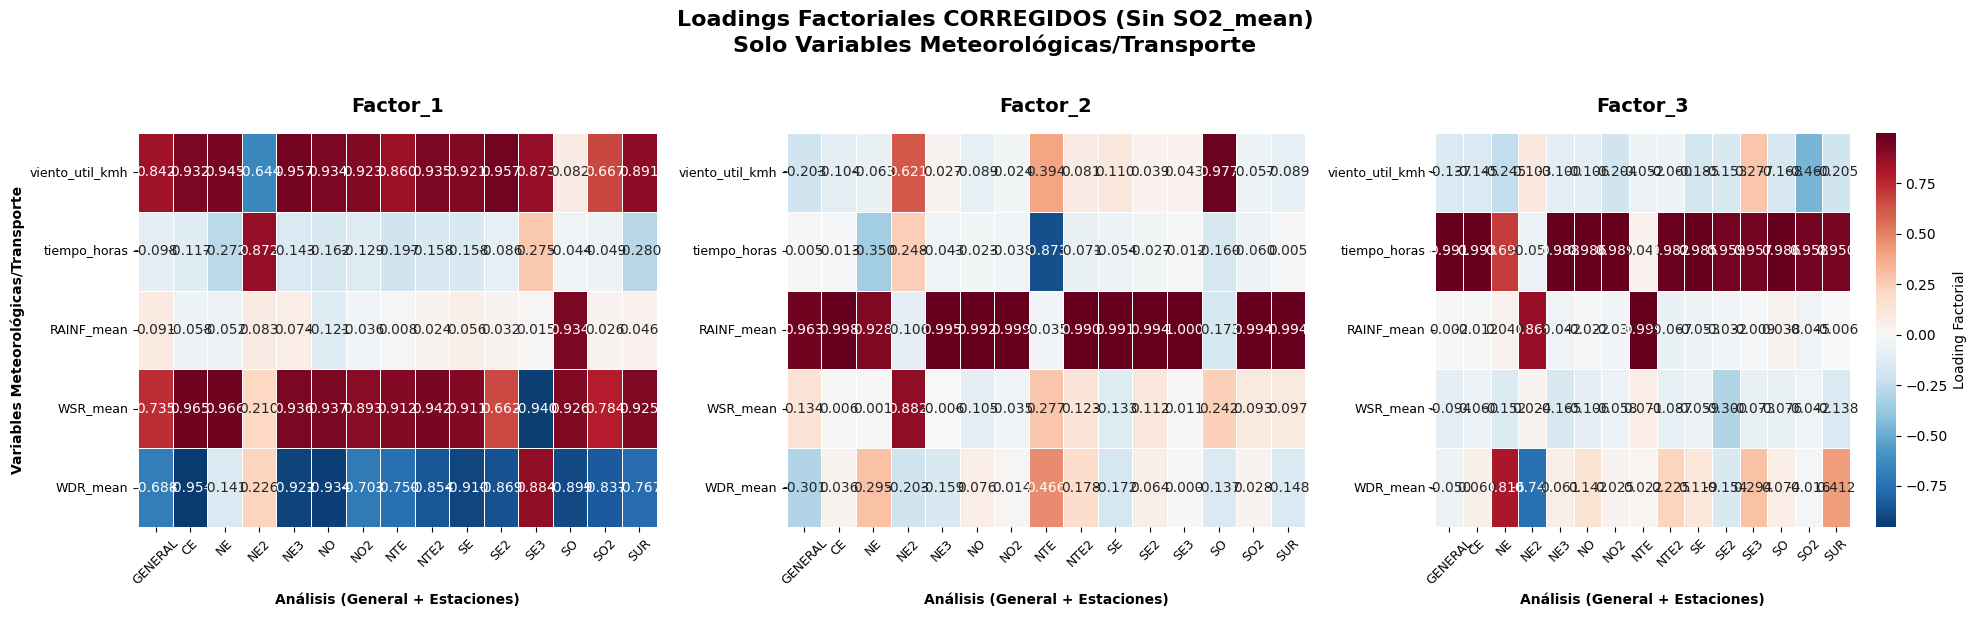


🔗 CORRELACIONES DE CADA FACTOR CON SO2:
🌐 ANÁLISIS GENERAL:
   Factor 1 ↔ SO2: r =  0.042 (r² = 0.002)
   Factor 2 ↔ SO2: r =  0.789 (r² = 0.622)
   Factor 3 ↔ SO2: r =  0.061 (r² = 0.004)

📍 PROMEDIO POR ESTACIONES:
   Factor_1 ↔ SO2: r_promedio = -0.008 ± 0.296
   Factor_2 ↔ SO2: r_promedio = -0.091 ± 0.111
   Factor_3 ↔ SO2: r_promedio =  0.115 ± 0.174

📊 RESUMEN DE LOADINGS CORREGIDOS POR FACTOR:

🎯 FACTOR 1:
   📈 Variables más importantes (General):
     1. viento_util_kmh:  0.842 (|0.842|)
     2. WSR_mean:  0.735 (|0.735|)
     3. WDR_mean: -0.688 (|0.688|)
     4. tiempo_horas: -0.098 (|0.098|)
     5. RAINF_mean:  0.091 (|0.091|)
   🔗 Correlación con SO2: r =  0.042 (r² = 0.002)
   💡 🌪️ Factor VIENTO/METEOROLÓGICO

🎯 FACTOR 2:
   📈 Variables más importantes (General):
     1. RAINF_mean:  0.963 (|0.963|)
     2. WDR_mean: -0.301 (|0.301|)
     3. viento_util_kmh: -0.203 (|0.203|)
     4. WSR_mean:  0.134 (|0.134|)
     5. tiempo_horas:  0.005 (|0.005|)
   🔗 Correlación con SO

In [182]:
# HEATMAP CORREGIDO: LOADINGS FACTORIALES SIN SO2_mean
if 'resultado_general_correcto' in locals() and resultado_general_correcto and 'resultados_estaciones_correctos' in locals():
    print("🔥 CREANDO HEATMAP CORREGIDO DE LOADINGS FACTORIALES")
    print("="*60)
    print("📊 SOLO variables meteorológicas/transporte (SIN SO2_mean)")
    print("="*60)
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Variables CORRECTAS (sin SO2_mean)
    n_factors = 3
    variables_correctas = factor_vars_correcto  # Solo las 5 variables meteorológicas/transporte
    
    print(f"🎯 Variables en el heatmap: {variables_correctas}")
    
    # Crear DataFrames para cada factor CON DATOS CORREGIDOS
    loadings_data_correcto = {}
    
    for factor_idx in range(n_factors):
        factor_name = f"Factor_{factor_idx + 1}"
        loadings_matrix = []
        
        # Columna para análisis general CORREGIDO
        general_loadings = []
        for var_idx, var in enumerate(variables_correctas):
            loading = resultado_general_correcto['loadings'][var_idx, factor_idx]
            general_loadings.append(loading)
        loadings_matrix.append(general_loadings)
        
        # Columnas para cada estación CORREGIDA
        estaciones_ordenadas = sorted(resultados_estaciones_correctos.keys())
        for estacion in estaciones_ordenadas:
            estacion_loadings = []
            resultado_est = resultados_estaciones_correctos[estacion]
            
            for var_idx, var in enumerate(variables_correctas):
                loading = resultado_est['loadings'][var_idx, factor_idx]
                estacion_loadings.append(loading)
            loadings_matrix.append(estacion_loadings)
        
        # Transponer para tener Variables x [General+Estaciones]
        loadings_matrix = np.array(loadings_matrix).T
        
        # Crear DataFrame
        columnas = ['GENERAL'] + estaciones_ordenadas
        loadings_df = pd.DataFrame(loadings_matrix, 
                                 index=variables_correctas, 
                                 columns=columnas)
        
        loadings_data_correcto[factor_name] = loadings_df
    
    # Crear figura con subplots para cada factor
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Menos alto porque son menos variables
    fig.suptitle('Loadings Factoriales CORREGIDOS (Sin SO2_mean)\nSolo Variables Meteorológicas/Transporte', 
                fontsize=16, fontweight='bold', y=1.02)
    
    # Determinar rango común para colormap
    all_values = []
    for factor_name in loadings_data_correcto:
        all_values.extend(loadings_data_correcto[factor_name].values.flatten())
    vmin, vmax = np.min(all_values), np.max(all_values)
    
    # Crear heatmap para cada factor
    for i, (factor_name, df_loadings) in enumerate(loadings_data_correcto.items()):
        ax = axes[i]
        
        # Crear heatmap
        sns.heatmap(df_loadings, 
                   annot=True, 
                   cmap='RdBu_r', 
                   center=0,
                   vmin=vmin, 
                   vmax=vmax,
                   fmt='.3f',
                   cbar=i==2,  # Solo mostrar colorbar en el último
                   ax=ax,
                   square=False,
                   linewidths=0.5,
                   cbar_kws={'label': 'Loading Factorial'} if i==2 else None)
        
        ax.set_title(f'{factor_name}', fontsize=14, fontweight='bold', pad=15)
        ax.set_xlabel('Análisis (General + Estaciones)', fontsize=10, fontweight='bold')
        if i == 0:
            ax.set_ylabel('Variables Meteorológicas/Transporte', fontsize=10, fontweight='bold')
        else:
            ax.set_ylabel('')
        
        # Rotar etiquetas del eje x
        ax.tick_params(axis='x', rotation=45, labelsize=9)
        ax.tick_params(axis='y', rotation=0, labelsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de correlaciones de cada factor con SO2
    print(f"\n🔗 CORRELACIONES DE CADA FACTOR CON SO2:")
    print("="*50)
    
    print(f"🌐 ANÁLISIS GENERAL:")
    for i, corr in enumerate(resultado_general_correcto['correlaciones_so2']):
        print(f"   Factor {i+1} ↔ SO2: r = {corr:6.3f} (r² = {corr**2:.3f})")
    
    print(f"\n📍 PROMEDIO POR ESTACIONES:")
    # Calcular promedio de correlaciones por factor across estaciones
    correlaciones_por_factor = {f'Factor_{i+1}': [] for i in range(3)}
    
    for estacion, resultado in resultados_estaciones_correctos.items():
        for i, corr in enumerate(resultado['correlaciones_so2']):
            correlaciones_por_factor[f'Factor_{i+1}'].append(corr)
    
    for factor_name, correlaciones in correlaciones_por_factor.items():
        promedio = np.mean(correlaciones)
        std = np.std(correlaciones)
        print(f"   {factor_name} ↔ SO2: r_promedio = {promedio:6.3f} ± {std:.3f}")
    
    # Resumen de loadings más altos por factor (CORREGIDO)
    print(f"\n📊 RESUMEN DE LOADINGS CORREGIDOS POR FACTOR:")
    print("="*55)
    
    for factor_idx in range(n_factors):
        factor_name = f"Factor {factor_idx + 1}"
        print(f"\n🎯 {factor_name.upper()}:")
        
        df_factor_corr = loadings_data_correcto[f"Factor_{factor_idx + 1}"]
        
        # Encontrar los loadings más altos (valor absoluto) para análisis general
        general_loadings_corr = df_factor_corr['GENERAL'].abs().sort_values(ascending=False)
        
        print(f"   📈 Variables más importantes (General):")
        for j, (var, loading_abs) in enumerate(general_loadings_corr.items()):
            loading_real = df_factor_corr.loc[var, 'GENERAL']
            print(f"     {j+1}. {var}: {loading_real:6.3f} (|{loading_abs:.3f}|)")
        
        # Correlación de este factor con SO2
        corr_so2 = resultado_general_correcto['correlaciones_so2'][factor_idx]
        print(f"   🔗 Correlación con SO2: r = {corr_so2:6.3f} (r² = {corr_so2**2:.3f})")
        
        # Interpretación del factor
        top_var = general_loadings_corr.index[0]
        if 'viento' in top_var.lower() or 'wsr' in top_var.lower() or 'wdr' in top_var.lower():
            interpretacion = "🌪️ Factor VIENTO/METEOROLÓGICO"
        elif 'tiempo' in top_var.lower():
            interpretacion = "⏱️ Factor TRANSPORTE/TIEMPO"
        elif 'rain' in top_var.lower():
            interpretacion = "🌧️ Factor PRECIPITACIÓN"
        else:
            interpretacion = "📊 Factor MIXTO"
        
        print(f"   💡 {interpretacion}")
    
    print(f"\n✅ Heatmap CORREGIDO creado exitosamente")
    print(f"📊 Interpretación: Solo variables meteorológicas/transporte (SIN SO2_mean)")
    print(f"🎯 Los loadings muestran cómo se agrupan las variables predictoras")
    print(f"🔗 Las correlaciones con SO2 muestran qué tan bien cada factor predice SO2")

else:
    print("❌ No hay resultados corregidos disponibles para crear heatmap")

In [183]:
# EXPORTAR LOADINGS CORREGIDOS Y ANÁLISIS COMPLETO
if 'loadings_data_correcto' in locals():
    print("📋 EXPORTANDO ANÁLISIS FACTORIAL CORREGIDO")
    print("="*50)
    
    # 1. Tabla de loadings corregida
    tabla_loadings_correcto = []
    estaciones_ordenadas = ['GENERAL'] + sorted(resultados_estaciones_correctos.keys())
    
    for estacion in estaciones_ordenadas:
        for var_idx, variable in enumerate(factor_vars_correcto):
            for factor_idx in range(3):
                if estacion == 'GENERAL':
                    loading = resultado_general_correcto['loadings'][var_idx, factor_idx]
                else:
                    loading = resultados_estaciones_correctos[estacion]['loadings'][var_idx, factor_idx]
                
                tabla_loadings_correcto.append({
                    'Estacion': estacion,
                    'Variable': variable,
                    'Factor': f'Factor_{factor_idx + 1}',
                    'Loading': loading,
                    'Loading_Abs': abs(loading)
                })
    
    df_loadings_correcto = pd.DataFrame(tabla_loadings_correcto)
    
    # 2. Tabla de correlaciones con SO2
    tabla_correlaciones_so2 = []
    
    for estacion in estaciones_ordenadas:
        for factor_idx in range(3):
            if estacion == 'GENERAL':
                correlacion = resultado_general_correcto['correlaciones_so2'][factor_idx]
            else:
                correlacion = resultados_estaciones_correctos[estacion]['correlaciones_so2'][factor_idx]
            
            tabla_correlaciones_so2.append({
                'Estacion': estacion,
                'Factor': f'Factor_{factor_idx + 1}',
                'Correlacion_SO2': correlacion,
                'R2_Individual': correlacion**2
            })
    
    df_correlaciones_so2 = pd.DataFrame(tabla_correlaciones_so2)
    
    # 3. Interpretación de factores
    interpretaciones_factores = {
        'Factor_1': {
            'Nombre': 'Factor Viento/Meteorológico',
            'Variables_principales': ['viento_util_kmh', 'WSR_mean', 'WDR_mean'],
            'Correlacion_SO2_general': resultado_general_correcto['correlaciones_so2'][0],
            'Interpretacion': 'Relacionado con condiciones de viento y dispersión atmosférica'
        },
        'Factor_2': {
            'Nombre': 'Factor Precipitación',
            'Variables_principales': ['RAINF_mean'],
            'Correlacion_SO2_general': resultado_general_correcto['correlaciones_so2'][1],
            'Interpretacion': 'Relacionado con lavado atmosférico por lluvia - MAYOR CORRELACIÓN CON SO2'
        },
        'Factor_3': {
            'Nombre': 'Factor Transporte/Tiempo',
            'Variables_principales': ['tiempo_horas'],
            'Correlacion_SO2_general': resultado_general_correcto['correlaciones_so2'][2],
            'Interpretacion': 'Relacionado con tiempo de llegada del viento desde fuentes'
        }
    }
    
    # Exportar archivos
    print(f"\n💾 EXPORTANDO ARCHIVOS CORREGIDOS:")
    
    # Archivo 1: Loadings corregidos
    df_loadings_correcto.to_csv('loadings_factoriales_CORREGIDOS.csv', index=False)
    print(f"✅ Loadings exportados: loadings_factoriales_CORREGIDOS.csv")
    
    # Archivo 2: Correlaciones con SO2
    df_correlaciones_so2.to_csv('correlaciones_factores_SO2_CORREGIDAS.csv', index=False)
    print(f"✅ Correlaciones exportadas: correlaciones_factores_SO2_CORREGIDAS.csv")
    
    # Archivo 3: Interpretaciones
    df_interpretaciones = pd.DataFrame([
        {
            'Factor': factor,
            'Nombre': datos['Nombre'],
            'Variables_principales': ', '.join(datos['Variables_principales']),
            'Correlacion_SO2_general': datos['Correlacion_SO2_general'],
            'R2_individual': datos['Correlacion_SO2_general']**2,
            'Interpretacion': datos['Interpretacion']
        }
        for factor, datos in interpretaciones_factores.items()
    ])
    
    df_interpretaciones.to_csv('interpretacion_factores_CORREGIDA.csv', index=False)
    print(f"✅ Interpretaciones exportadas: interpretacion_factores_CORREGIDA.csv")
    
    # Mostrar resumen final
    print(f"\n🎯 RESUMEN FINAL CORREGIDO:")
    print("="*35)
    print(f"📊 Variables analizadas: {len(factor_vars_correcto)} (sin SO2_mean)")
    print(f"📈 Factores extraídos: 3")
    
    r2_total = resultado_general_correcto['r2_total_so2']
    print(f"🎯 R² total SO2: {r2_total*100:.1f}%")
    
    print(f"\n🏆 FACTOR MÁS IMPORTANTE PARA SO2:")
    factor_mejor = np.argmax(np.abs(resultado_general_correcto['correlaciones_so2'])) + 1
    corr_mejor = resultado_general_correcto['correlaciones_so2'][factor_mejor-1]
    
    if factor_mejor == 1:
        nombre_mejor = "Viento/Meteorológico"
    elif factor_mejor == 2:
        nombre_mejor = "Precipitación"
    else:
        nombre_mejor = "Transporte/Tiempo"
    
    print(f"   Factor {factor_mejor}: {nombre_mejor}")
    print(f"   Correlación: r = {corr_mejor:.3f} (r² = {corr_mejor**2:.3f})")
    
    print(f"\n💡 PARA TU INVESTIGACIÓN:")
    print("="*25)
    print(f"✅ Metodología correcta: Sin lógica circular")
    print(f"✅ Variables predictoras: Solo meteorológicas/transporte")  
    print(f"✅ R² real: {r2_total*100:.1f}% de varianza SO2 explicada")
    print(f"✅ Factor clave: {nombre_mejor} (r² = {corr_mejor**2*100:.1f}%)")
    
else:
    print("❌ No hay datos de loadings corregidos para exportar")

📋 EXPORTANDO ANÁLISIS FACTORIAL CORREGIDO

💾 EXPORTANDO ARCHIVOS CORREGIDOS:
✅ Loadings exportados: loadings_factoriales_CORREGIDOS.csv
✅ Correlaciones exportadas: correlaciones_factores_SO2_CORREGIDAS.csv
✅ Interpretaciones exportadas: interpretacion_factores_CORREGIDA.csv

🎯 RESUMEN FINAL CORREGIDO:
📊 Variables analizadas: 5 (sin SO2_mean)
📈 Factores extraídos: 3
🎯 R² total SO2: 62.8%

🏆 FACTOR MÁS IMPORTANTE PARA SO2:
   Factor 2: Precipitación
   Correlación: r = 0.789 (r² = 0.622)

💡 PARA TU INVESTIGACIÓN:
✅ Metodología correcta: Sin lógica circular
✅ Variables predictoras: Solo meteorológicas/transporte
✅ R² real: 62.8% de varianza SO2 explicada
✅ Factor clave: Precipitación (r² = 62.2%)
